# Exercise 7
## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

%matplotlib inline

## 1. The 10-armed bandit

### 1.

In [2]:
reward_prob = np.random.uniform(0, 0.9, 10)
reward_prob

array([0.84555797, 0.64321353, 0.04963289, 0.52440158, 0.25780472,
       0.87891506, 0.75360624, 0.12002611, 0.60211198, 0.12353635])

### 2.

In [3]:
def generate_reward(reward_prob, lever_numbers):
    rewards = np.zeros(len(lever_numbers))
    for i, lever_number in enumerate(lever_numbers):
        if np.random.random() > reward_prob[lever_number]:
            rewards[i] = 0
        else:
            rewards[i] = 1
    return rewards

In [4]:
# Testing.
n = 10000
received_rewards = np.zeros(len(reward_prob))
for i in range(n):
    received_rewards += generate_reward(reward_prob, np.arange(0, 10))
received_rewards/=n

In [5]:
received_rewards

array([0.852 , 0.6462, 0.0518, 0.523 , 0.2588, 0.8795, 0.7529, 0.1197,
       0.6113, 0.124 ])

### 3.

In [6]:
# def update_q(reward_prob, q, eta = 0.01):
#     delta_q = eta * (generate_reward(reward_prob, np.arange(0, len(reward_prob))) - q)
#     q = q + delta_q
#     return q

In [7]:
def update_q(reward, pos, q, eta = 0.01):
    delta_q = eta * (reward - q[pos])
    q[pos] += delta_q
    return q

In [8]:
q = np.zeros(len(reward_prob))
q

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
for i in range(n):
    # Pulling the levers at all positions.
    q = update_q(reward_prob, np.arange(len(q)), q)
q

array([0.84555797, 0.64321353, 0.04963289, 0.52440158, 0.25780472,
       0.87891506, 0.75360624, 0.12002611, 0.60211198, 0.12353635])

### 4.

In [10]:
def eps_greedy(q, eps):
    """Return lever(s) to be pressed, q value of chosen lever, largest q value."""
    if np.random.random() < 1-eps:
        # Get all the maxima.
        pos = np.argwhere(q == np.amax(q)).flatten()
        val = np.take(q, pos, 0)[0]
        largest_val = val
    else:
        pos = np.random.randint(0, len(q))
        val = q[pos]
        largest_val = q[np.argmax(q)]
        pos = np.array([pos])
        
    return [pos, val, largest_val]

### 5.

In [11]:
def pure_greedy_seq():
    q = np.zeros(len(reward_prob))

    n = 1000
    expected_reward = np.zeros(n)

    for i in range(n):
        levers = eps_greedy(q, 0)
        pos = levers[0]
        reward = generate_reward(reward_prob, pos)
        q = update_q(reward, pos, q)

        expected_reward[i] = levers[1]
    
    return expected_reward

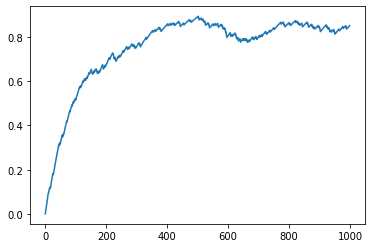

In [12]:
expected_reward = pure_greedy_seq()
plt.plot(expected_reward)

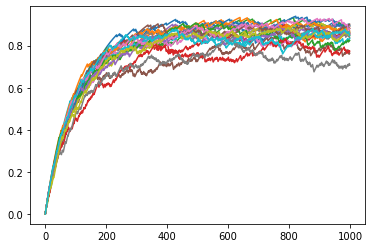

In [13]:
for i in range(20):
    expected_reward = pure_greedy_seq()
    plt.plot(expected_reward)

**Does the agent
consistently identify the levers with the largest reward probabilities?**

No.

### 6.

In [14]:
def get_seq(eps):
    q = np.zeros(len(reward_prob))

    n = 1000
    expected_reward = np.zeros(n)
    max_reward = np.zeros(n)

    for i in range(n):
        levers = eps_greedy(q, eps)
        pos = levers[0]
        reward = generate_reward(reward_prob, pos)
        q = update_q(reward, pos, q)

        expected_reward[i] = levers[1]
        max_reward[i] = levers[2]
    
    return expected_reward, max_reward

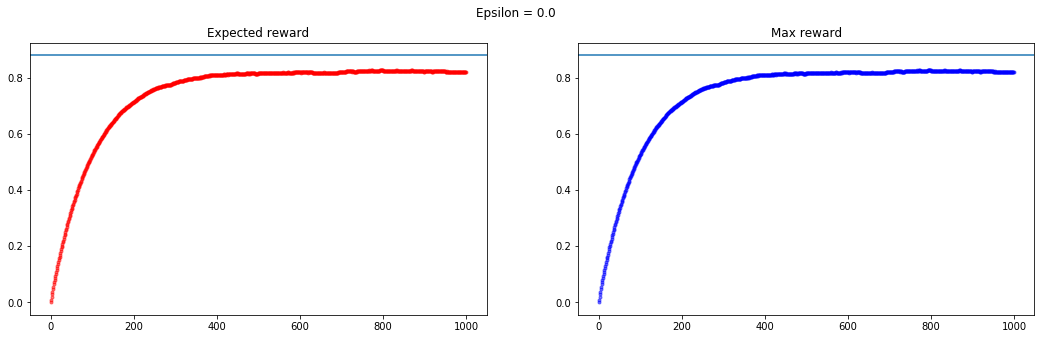

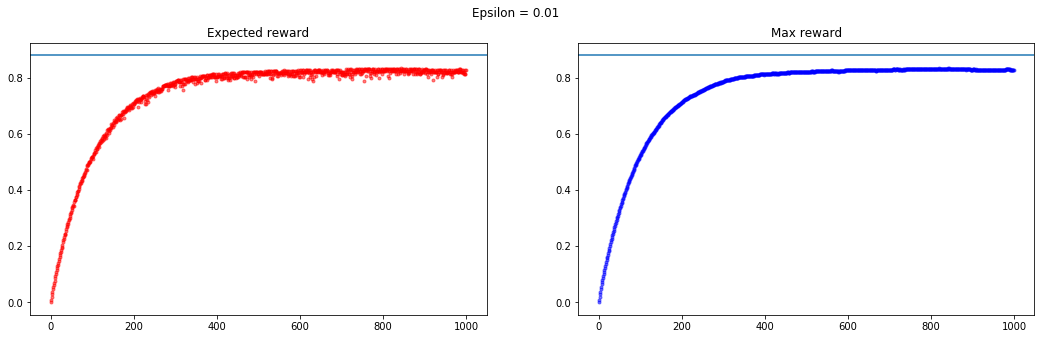

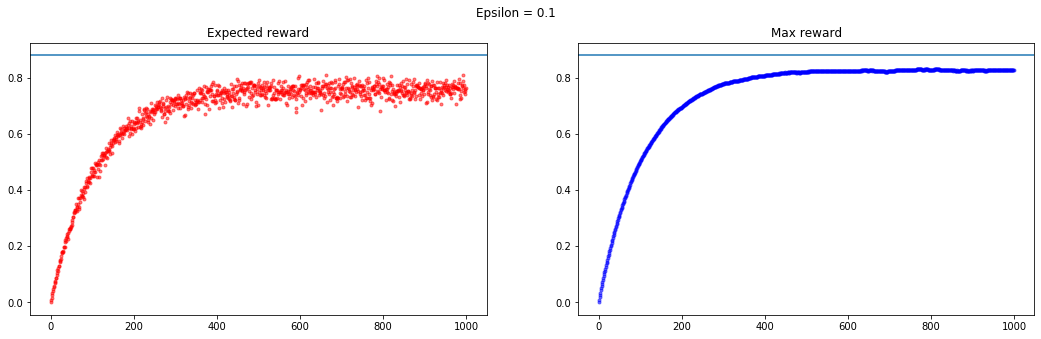

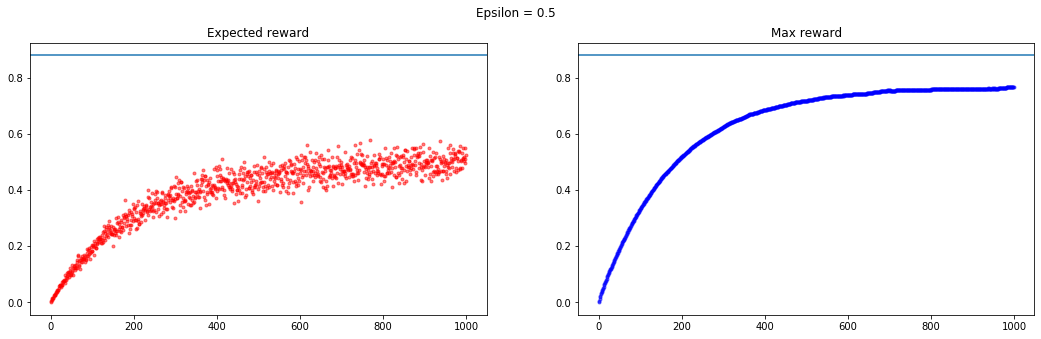

In [15]:
all_eps = [0.0, 0.01, 0.1, 0.5]

expected_reward = np.zeros(1000)
max_reward = np.zeros(1000)
lifes = 100

for eps in all_eps:
    for life in range(lifes):
        expected_reward_one_life, max_reward_one_life = get_seq(eps)
        expected_reward += expected_reward_one_life
        max_reward += max_reward_one_life
        
    expected_reward/= lifes
    max_reward/= lifes
    
    fig, axs = plt.subplots(1, 2, figsize = (18, 5))
    axs[0].plot(expected_reward, 'ro', markersize=3, alpha = 0.5)
    axs[0].set_title("Expected reward")
    axs[0].axhline(np.max(reward_prob))
    axs[1].plot(max_reward, 'bo', markersize=3, alpha = 0.5)
    axs[1].set_title("Max reward")
    axs[1].axhline(np.max(reward_prob))

    plt.suptitle(f"Epsilon = {eps}")
    plt.show()

**Why the looks?**

We need more time to converge for larger epsilon as the chance for taking a random negative action is higher. This is why it makes sense to adapt the epsilon to a lower value for lower lifetimes. 